In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from pkg import plot_map
import os
os.chdir("/Users/caropark/FAO_ag_check_code")

In [2]:
country_key = pd.read_csv("./data/country_key.csv")

regs = pd.read_csv("./data/yields_sm_tmax_reg.csv")[['cropname', 'country', 'adj_r2', 'coef_sm_dt', 'model']
                                                    ].merge(country_key[["iso_a3", "country"]], how="left", on="country")
wb_class = pd.read_csv("./data/wb_classification.csv")[['iso_a3', "class"]]
regs= regs.merge(wb_class, how="left", on="iso_a3")
regs

,cropname,country,adj_r2,coef_sm_dt,model,iso_a3,class
0,Barley,Afghanistan,0.680247,19.145458,Satellite,AFG,Low income
1,Barley,Albania,0.138549,2.528349,Satellite,ALB,Upper middle income
2,Barley,Algeria,0.652318,11.822276,Satellite,DZA,Upper middle income
3,Barley,Argentina,0.441898,6.383780,Satellite,ARG,Upper middle income
4,Barley,Armenia,-0.011941,-1.295867,Satellite,ARM,Upper middle income
...,...,...,...,...,...,...,...
3461,Yams,Sudan (former),0.140004,-0.029232,Survey,F206,NaN
3462,Yams,Togo,0.356288,7.173856,Survey,TGO,Low income
3463,Yams,Trinidad and Tobago,0.230040,14.540445,Survey,TTO,High income
3464,Yams,United Republic of Tanzania,-0.030026,-1.030911,Survey,TZA,Lower middle income


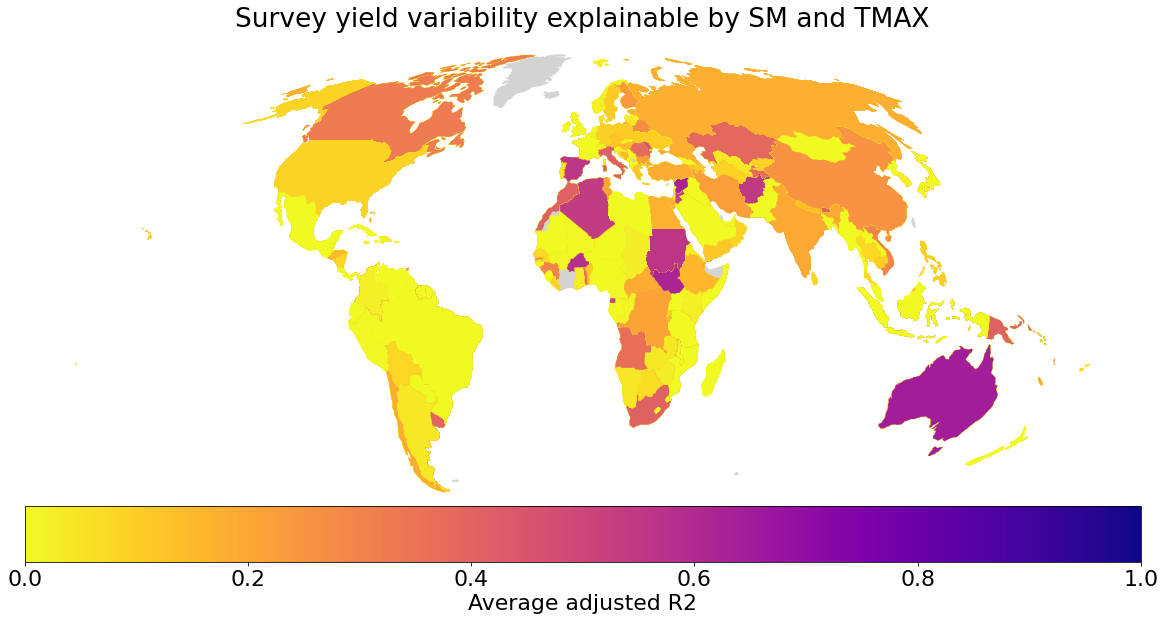

In [3]:
plot_map(regs[regs['model']=="Survey"], column="adj_r2", 
         title="Survey yield variability explainable by SM and TMAX", 
         cbar_label="Average adjusted R2", cmap="plasma_r", vmin=0, vmax=1,
         filename="survey_weather")

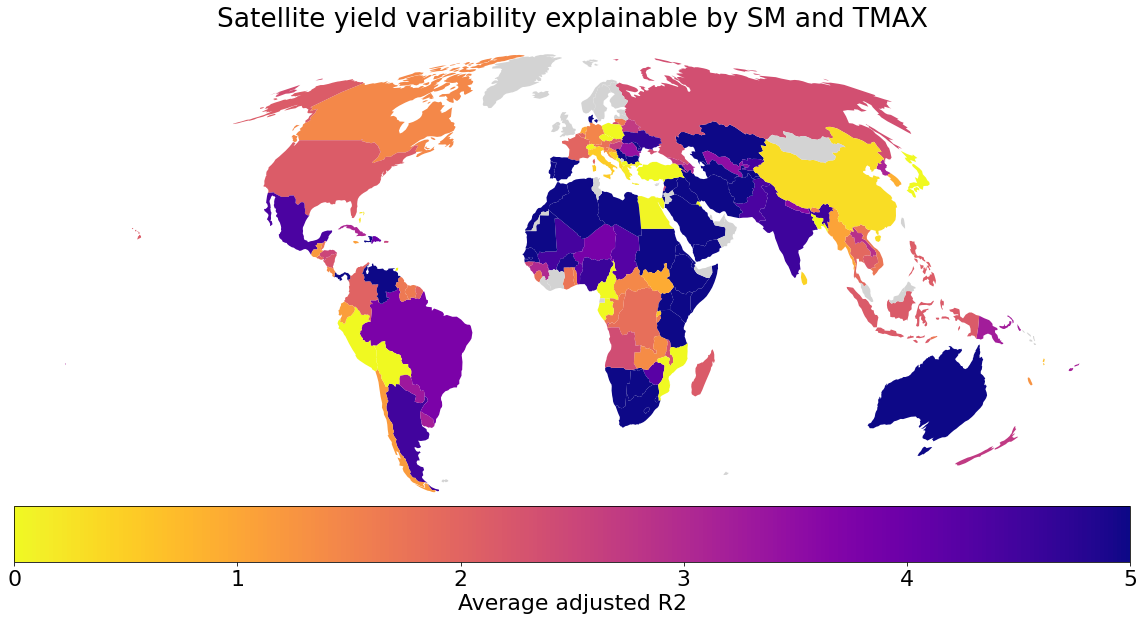

In [4]:
test = regs[(regs['model']== "Satellite") & (regs['cropname']=="Maize")]

plot_map(test, column="coef_sm_dt", 
         title="Satellite yield variability explainable by SM and TMAX", 
         cbar_label="Average adjusted R2", cmap="plasma_r", vmin=0, vmax=5,
         filename="DELETE")

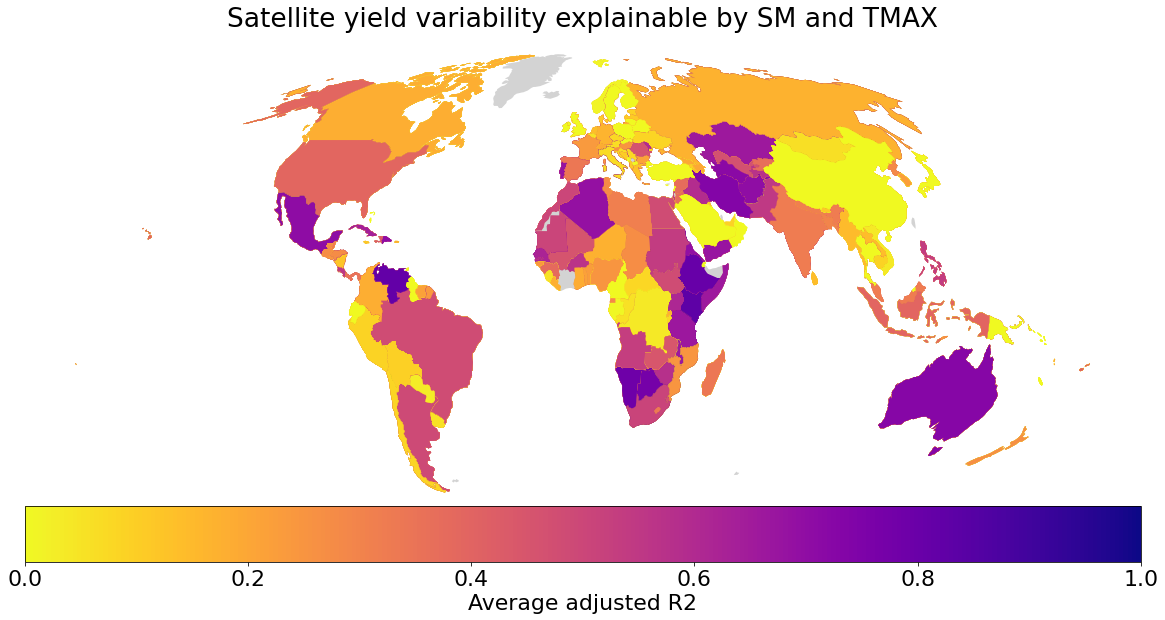

In [5]:
plot_map(regs[regs['model']=="Satellite"], column="adj_r2", 
         title="Satellite yield variability explainable by SM and TMAX", 
         cbar_label="Average adjusted R2", cmap="plasma_r", vmin=0, vmax=1,
         filename="satellite_weather")

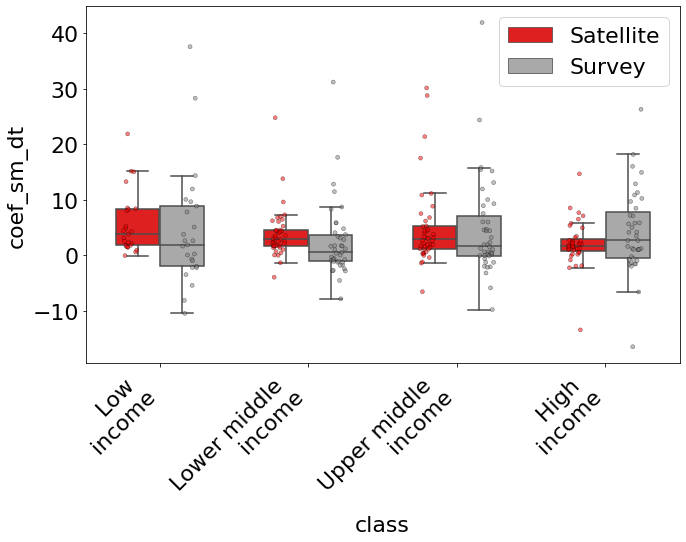

In [37]:
plt.figure(figsize=(10,8))

data= regs[regs['cropname']=="Maize"].copy()
order = ["Low income", "Lower middle income", "Upper middle income", "High income"]
data["class"] = pd.Categorical(data["class"], categories=order, ordered=True)
x= "class"
y= "coef_sm_dt"
source = "model"

ax = sns.boxplot(
    data=data,
    x=x, y=y,
    hue=source,
    palette={"Satellite": "red", "Survey": "darkgrey"},
    width=0.6, showfliers=False )

sns.stripplot(
    data=data,
    x=x, y=y,
    hue=source,
    dodge=True, jitter=True,
    palette={"Satellite": "red", "Survey": "grey"},
    alpha=0.5, size=4, linewidth=0.5, edgecolor="k")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:2], labels[0:2], )

ax.set_xticklabels(["Low \n income", "Lower middle \n income", "Upper middle \n income", "High \n income"], rotation=45, ha="right")
plt.tight_layout()
plt.show()
